![](images/ds_rural.png)

# Módulo 3

## Gráficos

**Casos reais**

In [1]:
# exemplo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# dataset por cidade
cidades =  pd.read_csv('data/brazil_covid19_cities.csv',delimiter=',')
cidades.head()

In [ ]:
# 
cidades.tail()

In [ ]:
# Estado do Rio
estado_rj = cidades[cidades['state'] == 'RJ']
estado_rj.head(10)

In [ ]:
# Estado do Rio de Janeiro
estado_rj.tail(10)

**Exemplo** sobre COVID19 áte 28-06-2020

In [50]:
# Covid no Brasil ate 28-06-202
brasil_28_06 =  pd.read_csv('data/brazil_covid19.csv',delimiter=',')
brasil_28_06.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [51]:
# cidades do Rio de Janeiro - tail
brasil_28_06.tail()

,date,region,state,cases,deaths
3370,2020-06-28,Sudeste,RJ,111298,9819
3371,2020-06-28,Sudeste,SP,271737,14338
3372,2020-06-28,Sul,PR,20742,599
3373,2020-06-28,Sul,RS,25243,559
3374,2020-06-28,Sul,SC,24364,312


In [52]:
# a que periodo se refere os dados?
import datetime
print('Data atual:',datetime.datetime.now())
today = datetime.datetime.now().strftime('%d/%m/%Y')
# datas dos dados
print('Data inicial:',min(brasil_28_06['date']))
print('Data final:',max(brasil_28_06['date']))

Data atual: 2020-06-29 18:07:25.655650
Data inicial: 2020-02-25
Data final: 2020-06-28


**Pergunta**: Qual a incidência diária de casos suspeitos, confirmados e mortes no período?

In [53]:
## Síntese diária
agrupados = brasil_28_06.groupby(['date'])['cases','deaths'].agg('sum')
agrupados.head()

C:\Anaconda373\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,cases,deaths
date,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0


In [ ]:
#!pip install ploty # conda install -c plotly plotly

In [ ]:
# grafico
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *
#
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title="Visualização Conjunta de Casos e Óbitos até " + today,)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Confirmados', x=agrupados.index, y=agrupados['cases']),
    go.Bar(name='Óbitos', x=agrupados.index, y=agrupados['deaths'])])
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Quantidade')
fig.update_layout(barmode='stack')
fig['layout'].update(layout)
#
fig.show()

### Graficando dados discretos

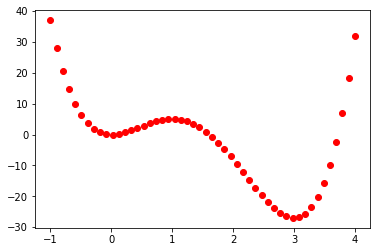

In [11]:
# graficando valores discretos
x = np.linspace(-1,4,50)
y = 3*(np.power(x,4)) - 16*(np.power(x,3))+18*(np.power(x,2))
#
plt.plot(x, y, 'o', color='red');

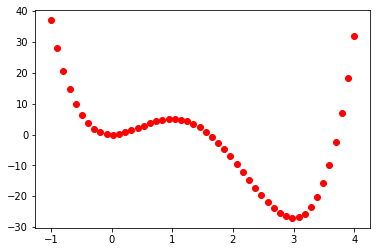

In [12]:
# usando scatter
plt.scatter(x, y,marker='o',color='red');

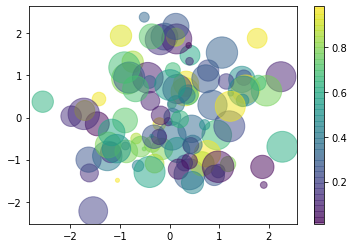

In [20]:
# usando scatter
rng = np.random.RandomState(0)
x1 = rng.randn(100)
y1 = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x1, y1, c=colors, s=sizes, alpha=0.5,cmap='viridis')
plt.colorbar(); 

Text(0.5, 0, 'Barras de Errores')

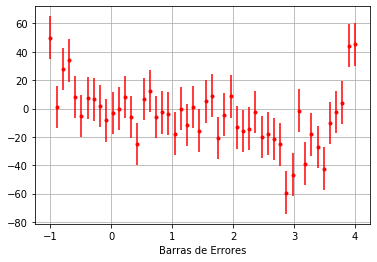

In [34]:
# Barras de erros
dy = 15.0
y2 = y + dy * np.random.randn(50)
#
plt.errorbar(x,y2,yerr=dy,fmt='.r')
plt.grid();
plt.xlabel('Barras de Errores')

In [44]:
# definicao de funcoes
def f1(x):
    return 3*(np.power(x,4)) - 16*(np.power(x,3))+18*(np.power(x,2))
#
def f(x,y):
    return f1(x)*10+f1(10+y*x)

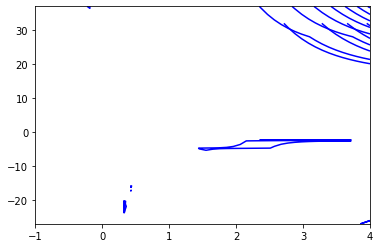

In [49]:
# graficos tri-dimensionais
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
plt.contour(X, Y, Z, colors='blue');

In [46]:
def f2(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

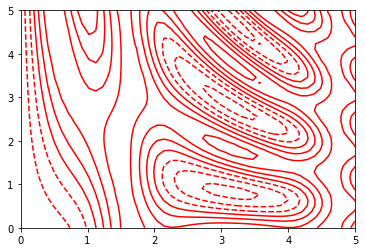

In [48]:
# contornos
x2 = np.linspace(0, 5, 50)
y2 = np.linspace(0, 5, 40)
X1, Y1 = np.meshgrid(x2, y2)
Z1 = f2(X1, Y1)
plt.contour(X1, Y1, Z1, colors='red');

## Histogramas

In [57]:
#plt.hist(agrupados);

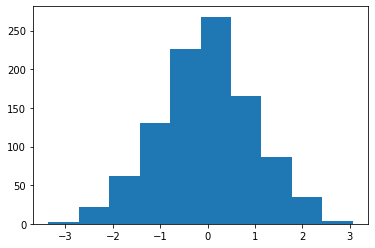

In [56]:
# histograma
#plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(data);

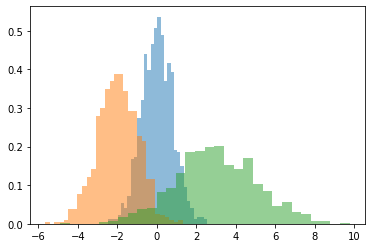

In [62]:
# varios histogramas
x3 = np.random.normal(0, 0.8, 1000)
x4 = np.random.normal(-2, 1, 1000)
x5 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=30)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)
plt.hist(x5, **kwargs);

---
Python pada Dada Science - Profs. {Jorge Zavaleta](zavaleta@pet-si.ufrrj.br) - Sergio Serra - Macário Costa.